# 🎲 Distribución Uniforme Discreta

La **distribución uniforme discreta** describe una situación donde **todos los valores enteros dentro de un rango finito tienen la misma probabilidad** de ocurrir.

---

## 📌 Definición Formal

Sea $ X $ una variable aleatoria discreta que toma valores enteros $ x_1, x_2, \dots, x_n $, entonces $ X $ sigue una distribución uniforme discreta si:

$$
P(X = x_i) = \frac{1}{n}, \quad \text{para } i = 1, 2, \dots, n
$$

---

## 🎯 Ejemplo

Lanzar un dado justo de seis caras:

- Posibles valores: $ 1, 2, 3, 4, 5, 6 $
- Probabilidad de cada cara:

$$
P(X = x) = \frac{1}{6}
$$

---

## 📐 Propiedades

| Propiedad         | Fórmula |
|-------------------|---------|
| Esperanza (media) | $ E[X] = \frac{a + b}{2} $ |
| Varianza          | $ \mathrm{Var}(X) = \frac{(b - a + 1)^2 - 1}{12} $ |

donde $ a $ y $ b $ son el menor y el mayor valor entero que puede tomar $ X $.

---

## 🧠 Características

- Valores **enteros y finitos**
- Todos los valores son **igualmente probables**
- Se utiliza en situaciones como:
  - Sorteos
  - Juegos de azar
  - Elección aleatoria entre opciones limitadas


Función de masa de probabilidad:
⎧0.166666666666667  for x ≥ 1 ∧ x ≤ 6
⎨                                    
⎩        0              otherwise    


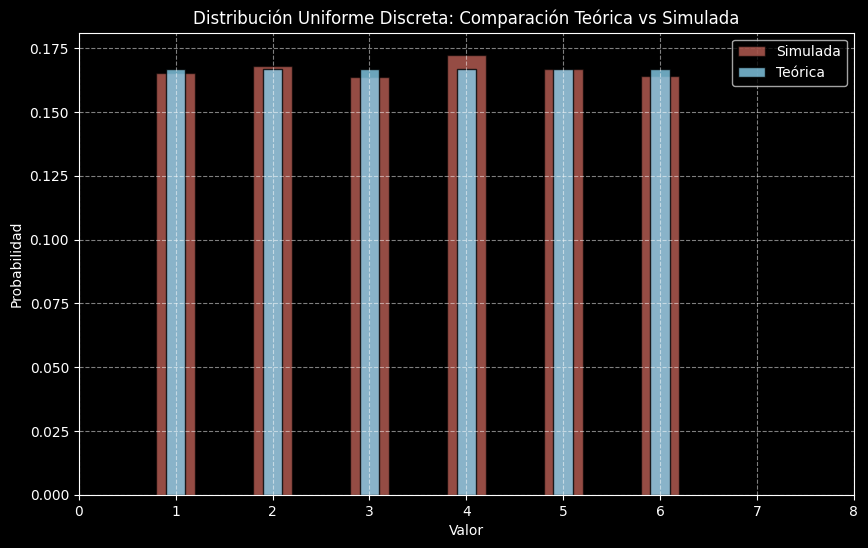

------ Medidas Teóricas ------
Esperanza (media): 3.5
Varianza: 2.9166666666666665

------ Medidas Simuladas ------
Media: 3.4998
Varianza: 2.8944


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Piecewise, pprint
plt.style.use('dark_background')

# --- 1. Función de masa de probabilidad ---
def distribucion_uniforme_discreta(a, b):
    x = symbols('x', integer=True)
    f_x = Piecewise(
        (1 / (b - a + 1), (x >= a) & (x <= b)),
        (0, True)
    )
    return f_x

# Mostrar la función simbólicamente
f = distribucion_uniforme_discreta(1, 6)
print("Función de masa de probabilidad:")
pprint(f)

# --- 2. Teoría ---
a, b = 1, 6
valores = np.arange(a, b + 1)
probabilidades_teoricas = [1 / (b - a + 1)] * len(valores)
esperanza_teorica = (a + b) / 2
varianza_teorica = ((b - a + 1)**2 - 1) / 12

# --- 3. Simulación ---
size = 10_000
simulacion = np.random.randint(a, b + 1, size=size)
valores_unicos, frecuencias = np.unique(simulacion, return_counts=True)
probabilidades_simuladas = frecuencias / size
media_simulada = np.mean(simulacion)
varianza_simulada = np.var(simulacion)

# --- 4. Gráfica ---
plt.figure(figsize=(10, 6))
plt.bar(valores_unicos, probabilidades_simuladas, width=0.4, label='Simulada', alpha=0.6, align='center', color='salmon', edgecolor='black')
plt.bar(valores, probabilidades_teoricas, width=0.2, label='Teórica', alpha=0.8, align='center', color='skyblue', edgecolor='black')

plt.title('Distribución Uniforme Discreta: Comparación Teórica vs Simulada')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.xticks(range(a-1, b + 3))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# --- 5. Medidas ---
print("------ Medidas Teóricas ------")
print(f"Esperanza (media): {esperanza_teorica}")
print(f"Varianza: {varianza_teorica}")

print("\n------ Medidas Simuladas ------")
print(f"Media: {media_simulada:.4f}")
print(f"Varianza: {varianza_simulada:.4f}")
